Labor 6: Sprach-Analyse und Sprach-Synthese mit LPC

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd
from scipy.io import wavfile
from scipy.signal import freqz, lfilter, find_peaks
from scipy.linalg import toeplitz

a: Führen Sie eine LPC-Analyse für den Vokal a und den Konsonanten f durch. Schneiden Sie hierzu
aus einem Sprachsignal eine ca. 20ms lange Sequenz aus, die den jeweiligen Laut enthält. Bestimmen
Sie den inversen und den Synthesefilter. Zeichnen Sie die Zero-Pole-Darstellung und interpretieren Sie
das Ergebnis

C:\Users\dzaen\AppData\Local\Temp\ipykernel_16524\1606901545.py:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs_a, a_signal = wavfile.read('a.wav')


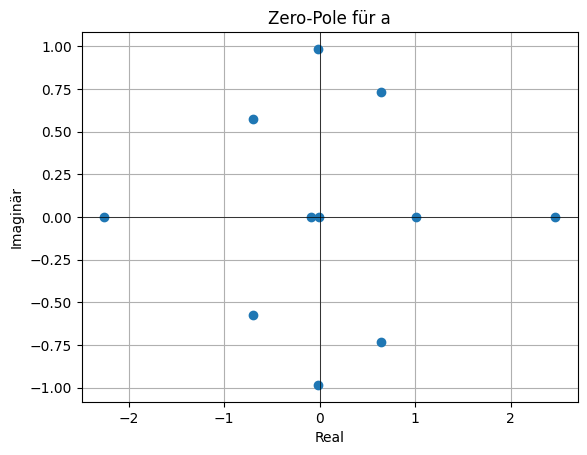

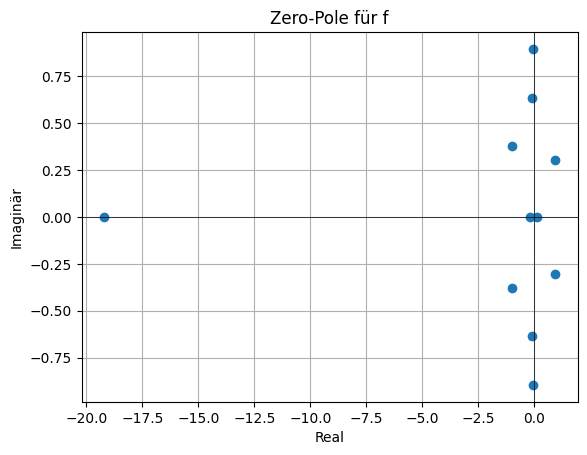

In [2]:
fs_a, a_signal = wavfile.read('a.wav')
fs_f, f_signal = wavfile.read('f.wav')

def perform_lpc(signal, order):
    R = np.correlate(signal, signal, mode='full')
    R = R[len(R)//2:]
    R = R[:order+1]
    E = np.zeros(order+1)
    K = np.zeros(order)
    A = np.zeros(order+1)
    E[0] = R[0]
    for k in range(1, order+1):
        K[k-1] = (R[k] - np.dot(A[1:k][::-1], R[1:k])) / E[k-1]
        A[1:k] += K[k-1] * A[1:k][::-1]
        A[k] = K[k-1]
        E[k] = (1 - K[k-1]**2) * E[k-1]
    return A, E[-1], K

order = 12
a_a, var_a, ref_a = perform_lpc(a_signal, order)
a_f, var_f, ref_f = perform_lpc(f_signal, order)

z = np.roots(a_a)
plt.figure()
plt.plot(np.real(z), np.imag(z), 'o')
plt.title("Zero-Pole für a")
plt.xlabel('Real')
plt.ylabel('Imaginär')
plt.axhline(0, color='black', lw=0.5)
plt.axvline(0, color='black', lw=0.5)
plt.grid()
plt.show()

z = np.roots(a_f)
plt.figure()
plt.plot(np.real(z), np.imag(z), 'o')
plt.title("Zero-Pole für f")
plt.xlabel('Real')
plt.ylabel('Imaginär')
plt.axhline(0, color='black', lw=0.5)
plt.axvline(0, color='black', lw=0.5)
plt.grid()
plt.show()

Hier wird eine LPC-Analyse für die Audiosignale "a.wav" und "f.wav" durchgeführt und die Pole der LPC-Polynome geplottet. Das Diagramm zeigt, dass der Vokal a klare Formanten hat, die durch die Pole auf dem Einheitskreis dargestellt werden, während der Konsonant f ein rauschähnliches Signal mit unregelmäßig verteilten Polen und Nullstellen aufweist, was typisch für frikative Konsonanten ist.

b: Berechnen Sie anschließend den Frequenzgang des Synthesefilters und vergleichen Sie das Ergebnis
mit dem Leitungsspektrum ihres Signals. Variieren Sie die Prädikator Ordnung M und beschreiben das
beobachtete Verhalten.

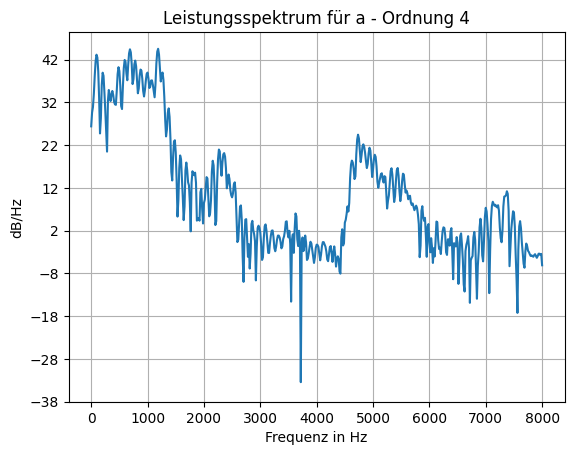

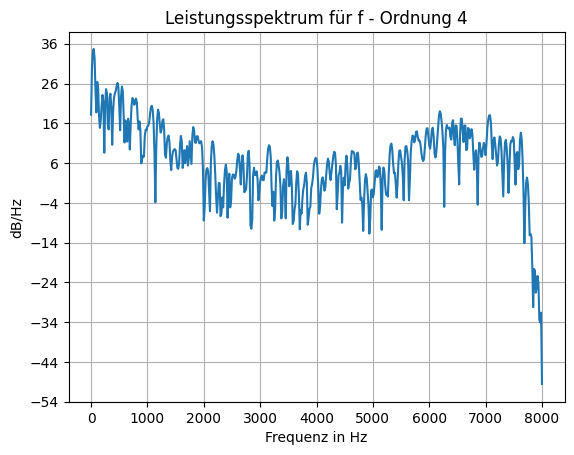

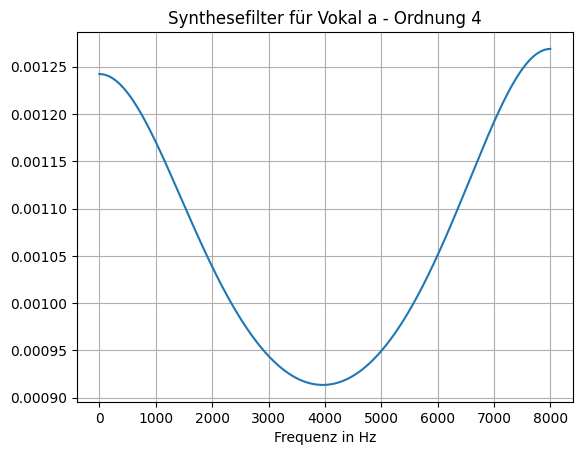

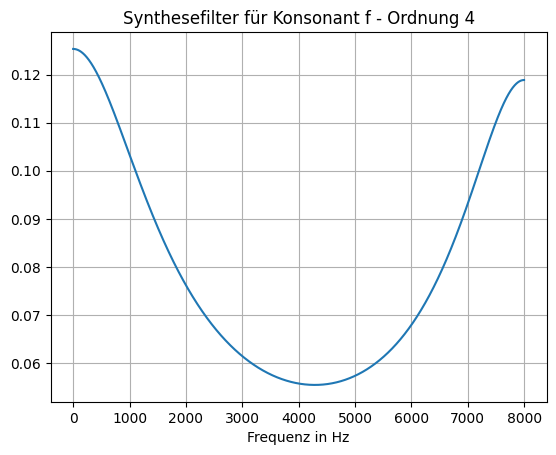

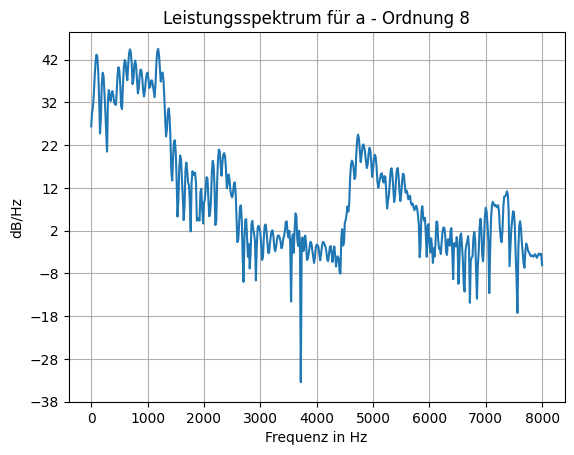

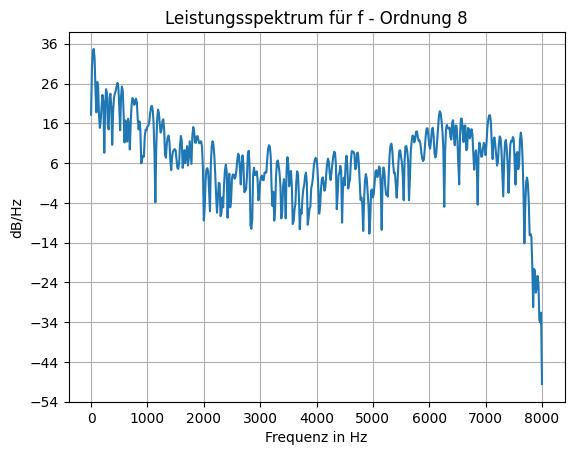

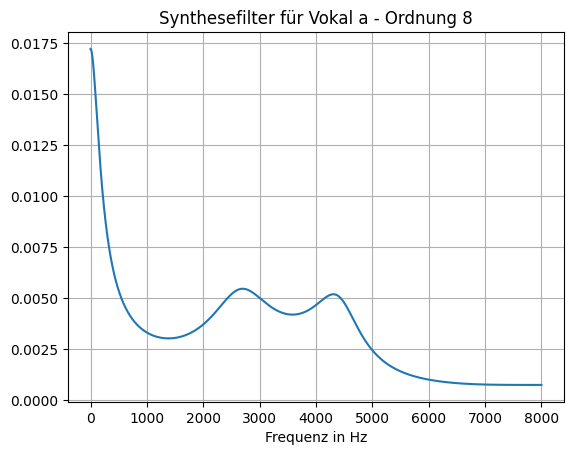

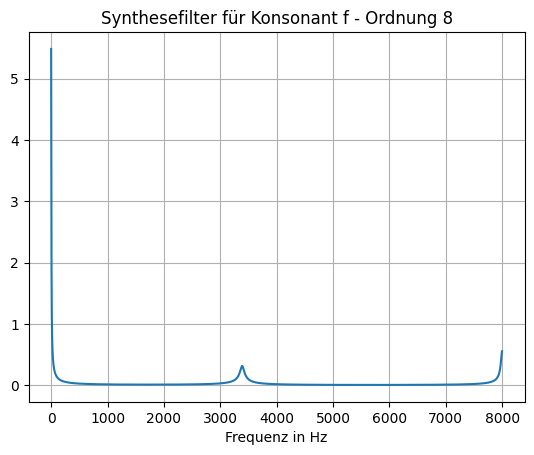

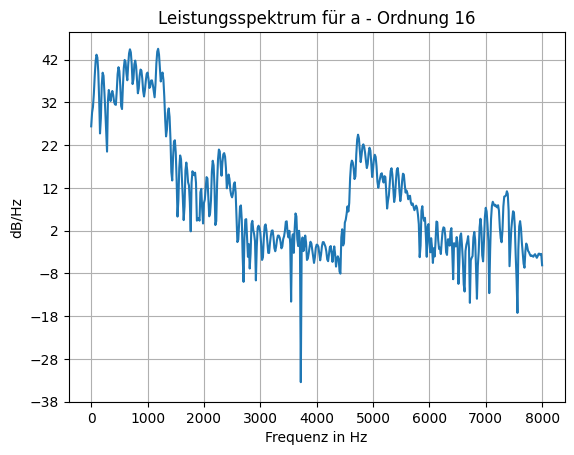

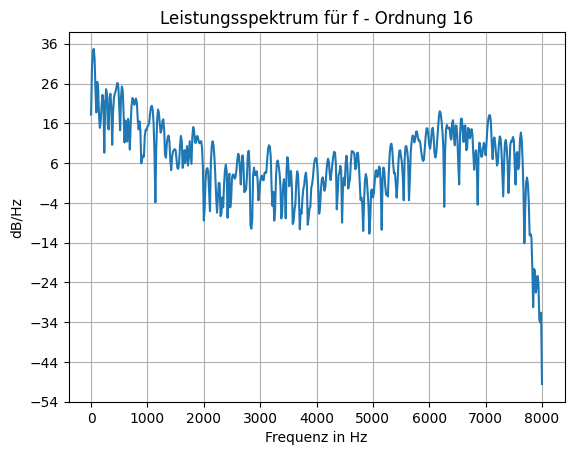

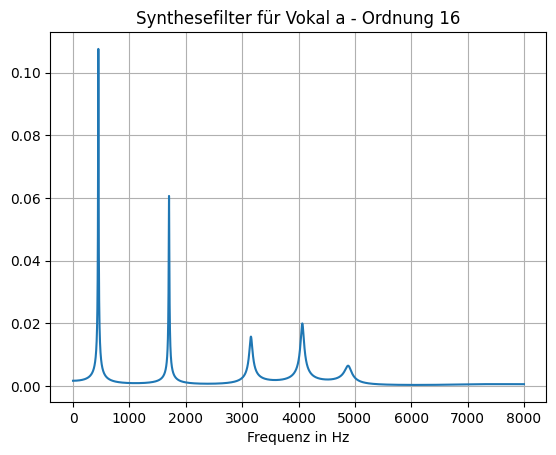

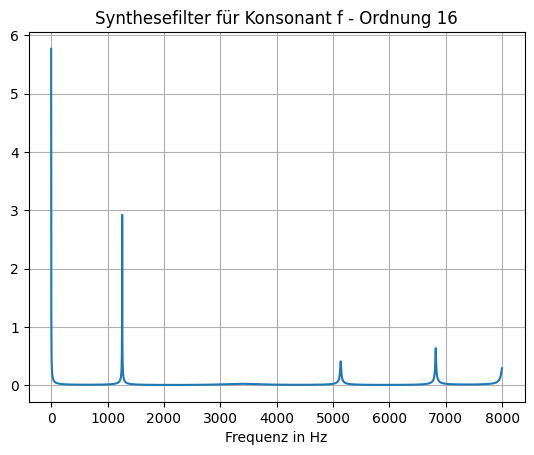

In [3]:
def plot_spectrum(signal, fs, title):
    freqs, psd = plt.psd(signal, NFFT=1024, Fs=fs)
    plt.title(title)
    plt.xlabel('Frequenz in Hz')
    plt.ylabel('dB/Hz')
    plt.show()

def plot_frequency_response(a, fs, title):
    w, h = freqz(1, a, worN=8000)
    plt.figure()
    plt.plot(0.5 * fs * w / np.pi, np.abs(h))
    plt.title(title)
    plt.xlabel('Frequenz in Hz')
    plt.ylabel('')
    plt.grid()
    plt.show()

orders = [4, 8, 16]
for order in orders:
    a_a, var_a, ref_a = perform_lpc(a_signal, order)
    a_f, var_f, ref_f = perform_lpc(f_signal, order)

    plot_spectrum(a_signal, fs_a, f'Leistungsspektrum für a - Ordnung {order}')
    plot_spectrum(f_signal, fs_f, f'Leistungsspektrum für f - Ordnung {order}')

    plot_frequency_response(a_a, fs_a, f'Synthesefilter für Vokal a - Ordnung {order}')
    plot_frequency_response(a_f, fs_f, f'Synthesefilter für Konsonant f - Ordnung {order}')

Es wird eine LPC-Analyse für die Audiosignale a.wav und f.wav bei Ordnungen 4, 8 und 16 durchgeführt, wobei das Leistungsspektrum und die Frequenzantwort der resultierenden LPC-Modelle geplottet werden. Mit steigender Ordnung wird die Modellierung und Darstellung der Frequenzkomponenten detaillierter und präziser.

c: Führen Sie nun eine LPC-Analyse für einen ganzen Satz durch ("Dies ist eine Suchmaschine, die die
neuesten Erkenntnisse liefert."). Zeichnen Sie das Signal mit einer Abtastrate von 8kHz auf. Bestimmen
Sie anschließend mit einer Kurzzeit-LPC-Analyse für eine Fensterbreite (w=200, wshift=w/2) den
inversen Filter A (M=12) und speichern diesen pro Zeit Slot als Spalte in einer Matrix

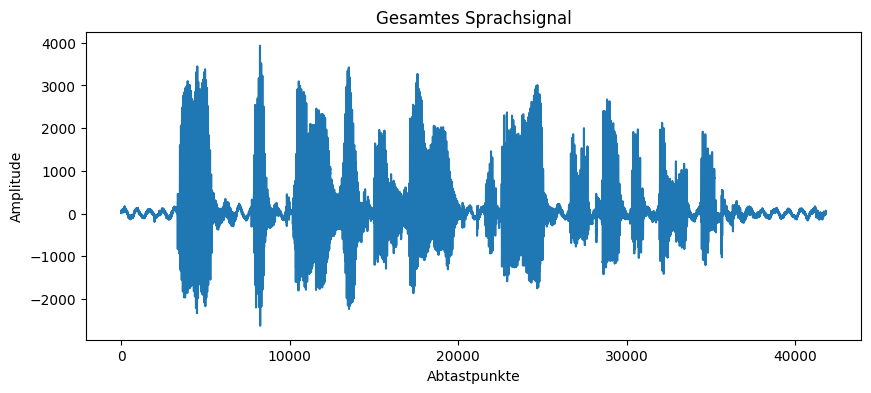

LPC-Koeffizientenmatrix:
Zeit-Slot 1: [ 1.         -1.15058108 -0.22364929  0.65232428 -0.00540586 -0.33054432
  0.02696533  0.01708617  0.00805656 -0.07619798  0.21953574 -0.11754609
 -0.14250085  0.20075292  0.07454806 -0.22440274  0.07647631]
Zeit-Slot 2: [ 1.         -1.12344369 -0.44524449  0.89596058 -0.33260282 -0.21131557
  0.14215189 -0.0938353   0.09057721  0.32575815 -0.20010167  0.00215192
  0.15395787 -0.17886485 -0.06755725  0.06573701 -0.0204104 ]
Zeit-Slot 3: [ 1.00000000e+00 -1.19637164e+00 -2.41534701e-02  3.98019080e-01
 -1.37643787e-01 -6.33837983e-02 -6.88612970e-02  1.47900145e-01
 -6.01191285e-02 -6.21858903e-03  7.56727877e-02 -2.16012674e-01
  1.80957073e-01  3.81170103e-02 -7.91696783e-02  1.87094776e-02
  6.49394117e-04]
Zeit-Slot 4: [ 1.         -1.02820171 -0.21287861  0.25515008  0.09318647 -0.18279765
  0.1093877  -0.11342308 -0.11221252  0.40925912 -0.1563397  -0.05197486
  0.0942734  -0.09536878  0.01831411  0.03132348 -0.04515322]
Zeit-Slot 5: [ 1.    

In [4]:
fs, signal = wavfile.read('suchmaschine_neu.wav')

w = 200
wshift = w // 2

num_windows = (len(signal) - w) // wshift + 1
lpc_matrix = np.zeros((order + 1, num_windows))

for i in range(num_windows):
    start = i * wshift
    end = start + w
    windowed_signal = signal[start:end] * np.hamming(w)
    autocorr = np.correlate(windowed_signal, windowed_signal, mode='full')[w-1:]
    R = autocorr[:order+1]
    R_matrix = toeplitz(R[:-1])
    r_vector = R[1:]
    A = np.linalg.inv(R_matrix).dot(r_vector)
    lpc_matrix[:, i] = np.concatenate(([1], -A))

plt.figure(figsize=(10, 4))
plt.plot(signal)
plt.title("Gesamtes Sprachsignal")
plt.xlabel("Abtastpunkte")
plt.ylabel("Amplitude")
plt.show()

print("LPC-Koeffizientenmatrix:")
for i in range(min(10, num_windows)):
    print(f"Zeit-Slot {i+1}: {lpc_matrix[:, i]}")

Es wird eine LPC-Analyse des Audiosignals suchmaschine_neu.wav durchgeführt, wobei das Signal in Fenster unterteilt wird, um die LPC-Koeffizienten für jedes Fenster zu berechnen und in einer Matrix zu speichern, und anschließend wird das gesamte Sprachsignal geplottet. Es werden die ersten zehn Zeit-Slots der LPC-Koeffizientenmatrix werden ausgegeben.

d: Bestimmen Sie mittels der Autokorrelationsfunktion den zeitlichen Verlauf der Grundfrequenz F0.
Plotten Sie F0 und die Maxima der AKF als Histogramm im zeitlichen Verlauf

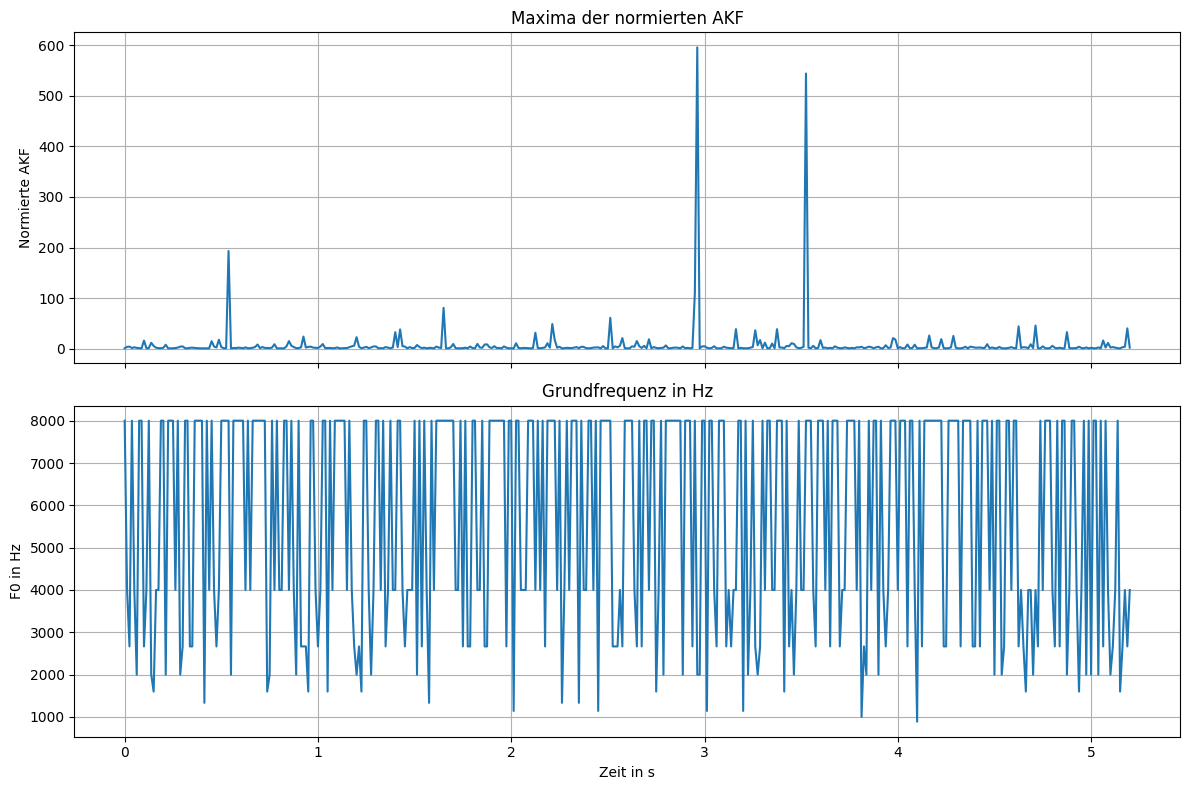

In [5]:
def autocorrelation(x):
    result = np.correlate(x, x, mode='full')
    return result[result.size // 2:]

max_akf = np.zeros(num_windows)
fundamental_freq = np.zeros(num_windows)

for i in range(num_windows):
    start = i * wshift
    end = start + w
    window = signal[start:end]
    if len(window) == w:
        r = autocorrelation(window)
        max_akf[i] = max(r[1:] / r[0])
        peaks = np.where(r[1:] > 0.3 * r[0])[0]
        if len(peaks) > 0:
            fundamental_freq[i] = fs / (peaks[0] + 1)
        else:
            fundamental_freq[i] = 0

time_windows = np.arange(num_windows) * wshift / fs
fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

axes[0].plot(time_windows, max_akf)
axes[0].set_title('Maxima der normierten AKF')
axes[0].set_ylabel('Normierte AKF')
axes[0].grid()

axes[1].plot(time_windows, fundamental_freq)
axes[1].set_title('Grundfrequenz in Hz')
axes[1].set_ylabel('F0 in Hz')
axes[1].set_xlabel('Zeit in s')
axes[1].grid()

plt.tight_layout()
plt.show()

Berechnung der Maxima der normierten Autokorrelationsfunktion und der Grundfrequenz F0 in überlappenden Fenstern eines Audiosignals und Visualisierung dieser Veränderungen über die Zeit.

e: Führen Sie nun eine LPC-Synthese mittels den in Teilaufgabe c pro Zeitabschnitt bestimmten Filters A
durch. Setzen Sie ihr Signal abschnittsweise unter Verwendung der Grundfrequenz F0 und der
Gesamtenergie E des Signals zusammen. Ermöglichen Sie dabei die Variation der Grundfrequenz F0
sowie die Variation der zeitlichen Signallänge L. Plotten Sie das ursprüngliche und das generierte
Signal und vergleichen Sie beide. Geben Sie ihr generiertes Signal auf einem Lautsprecher aus und
diskutieren Sie die erreichte Sprachqualität mit dem Original. Verändern Sie die Parameter M, F0 und L
und diskutieren Sie die Ergebnisse.

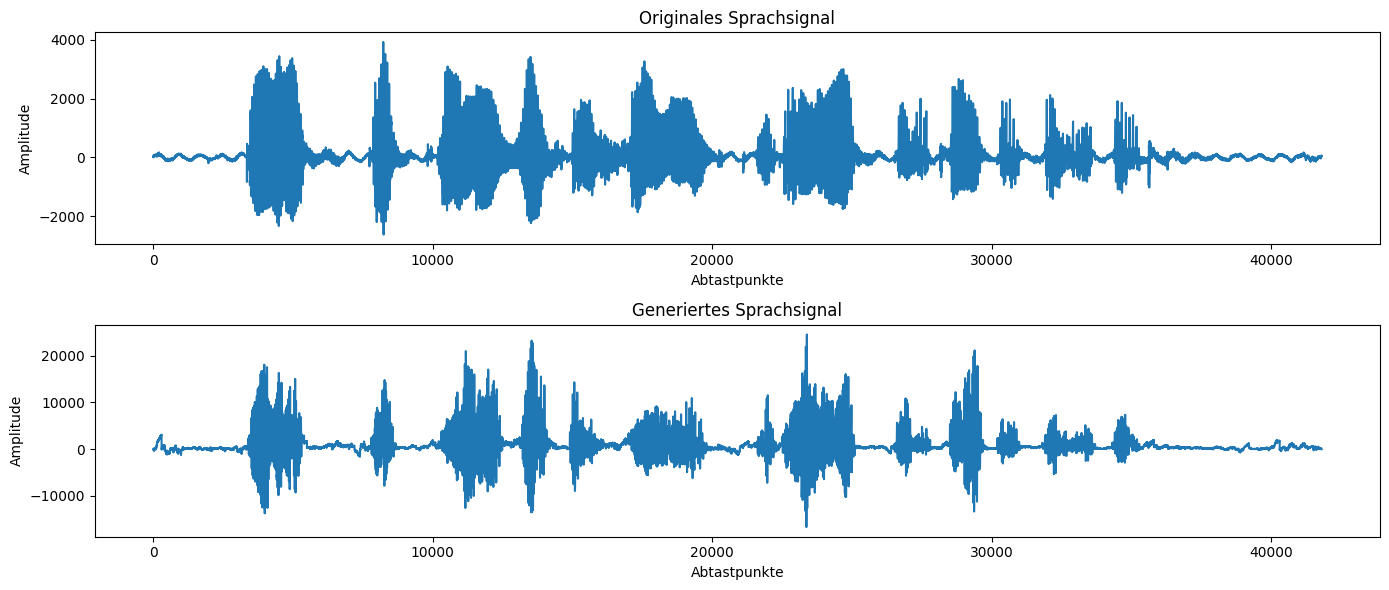

In [6]:
def calculate_f0(signal, fs, w, wshift):
    num_windows = (len(signal) - w) // wshift + 1
    F0 = np.zeros(num_windows)
    for i in range(num_windows):
        start = i * wshift
        end = start + w
        windowed_signal = signal[start:end] * np.hamming(w)
        akf = np.correlate(windowed_signal, windowed_signal, mode='full')[w-1:]
        peaks, _ = find_peaks(akf)
        if len(peaks) > 1:
            peak_distances = np.diff(peaks)
            peak_distances = peak_distances[peak_distances > 0]
            if len(peak_distances) > 0:
                avg_peak_distance = np.mean(peak_distances)
                F0[i] = fs / avg_peak_distance
            else:
                F0[i] = 0
        else:
            F0[i] = 0
    return F0

F0 = calculate_f0(signal, fs, w, wshift)

def lpc_synthesis(lpc_matrix, F0, fs, w, wshift, signal_length):
    num_windows = lpc_matrix.shape[1]
    synthesized_signal = np.zeros(signal_length)
    for i in range(num_windows):
        start = i * wshift
        end = start + w
        A = lpc_matrix[:, i]
        if F0[i] > 0:
            period = int(fs / F0[i])
            excitation = np.zeros(w)
            excitation[::period] = np.sqrt(np.var(signal[start:end]))
        else:
            excitation = np.random.randn(w) * np.sqrt(np.var(signal[start:end]))
        synthesized_segment = lfilter([1], A, excitation)
        synthesized_signal[start:end] += synthesized_segment
    return synthesized_signal

synthesized_signal = lpc_synthesis(lpc_matrix, F0, fs, w, wshift, len(signal))

plt.figure(figsize=(14, 6))
plt.subplot(2, 1, 1)
plt.plot(signal)
plt.title("Originales Sprachsignal")
plt.xlabel("Abtastpunkte")
plt.ylabel("Amplitude")

plt.subplot(2, 1, 2)
plt.plot(synthesized_signal)
plt.title("Generiertes Sprachsignal")
plt.xlabel("Abtastpunkte")
plt.ylabel("Amplitude")

plt.tight_layout()
plt.show()

wavfile.write('suchmaschine_synthesiert.wav', fs, synthesized_signal.astype(np.int16))

ipd.Audio('suchmaschine_synthesiert.wav')